In [1]:
# Import all required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tmu.models.classification.vanilla_classifier import TMClassifier

2025-01-01 11:33:16,660 - tmu.util.cuda_profiler - WARNING - Could not import pycuda: No module named 'pycuda'
2025-01-01 11:33:16,661 - tmu.clause_bank.clause_bank_cuda - ERROR - No module named 'pycuda'
Traceback (most recent call last):
  File "C:\Users\kjell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tmu\clause_bank\clause_bank_cuda.py", line 41, in <module>
    from pycuda._driver import Device, Context
ModuleNotFoundError: No module named 'pycuda'
2025-01-01 11:33:16,668 - tmu.clause_bank.clause_bank_cuda - WARNING - Could not import pycuda. This indicates that it is not installed! A possible fix is to run 'pip install pycuda'. Fallback to CPU ClauseBanks.


In [2]:
include_sensors = ["sensor_0_avg", "sensor_1_avg", "power_2_avg", "sensor_3_avg", "sensor_4_avg", "sensor_9_avg", "power_5_avg", "power_6_avg", "sensor_7_avg", "sensor_8_avg", "sensor_10_avg", "sensor_11_avg"]

def load_df_and_annotate_anomalies(farm, dataset_id):
    path = f"../../data/care_to_compare/Wind Farm {farm}/datasets/{dataset_id}.csv"
    df = pd.read_csv(path, delimiter=';')
    
    # If ['status_type_id'] is 0 or 2, then 0, else 1
    df['label'] = df['status_type_id'].apply(lambda x: 0 if x in [0, 2] else 1)
    
    # Drop all columns except the ones in include_sensors
    df = df[include_sensors + ['label', 'train_test']]
    
    return df

In [3]:
# Load all required data for training

# 68;anomaly;2015-07-29 13:20:00;52063;2015-08-12 13:10:00;54076;Transformer failure

# Load csv file
df = pd.concat([
    load_df_and_annotate_anomalies('C', 55), 
    load_df_and_annotate_anomalies('C', 81), 
    load_df_and_annotate_anomalies('C', 8),
    load_df_and_annotate_anomalies('C', 85)
])
# Sensors to use

train_data = df[df['train_test'] == 'train']
test_data = df[df['train_test'] == 'prediction']

X_train = train_data.drop(columns=['label', 'train_test'])
y_train = train_data['label']

X_test = test_data.drop(columns=['label', 'train_test'])
y_test = test_data['label']

# Print number of 0s and 1s in the label sets
train_0s = np.count_nonzero(y_train == 0)
train_1s = np.count_nonzero(y_train == 1)

print(f"Train data: {train_0s} 0s and {train_1s} 1s")

test_0s = np.count_nonzero(y_test == 0)
test_1s = np.count_nonzero(y_test == 1)

print(f"Test data: {test_0s} 0s and {test_1s} 1s")

# PRint column names
print(X_train.columns)

Train data: 187613 0s and 20899 1s
Test data: 8051 0s and 341 1s
Index(['sensor_0_avg', 'sensor_1_avg', 'power_2_avg', 'sensor_3_avg',
       'sensor_4_avg', 'sensor_9_avg', 'power_5_avg', 'power_6_avg',
       'sensor_7_avg', 'sensor_8_avg', 'sensor_10_avg', 'sensor_11_avg'],
      dtype='object')


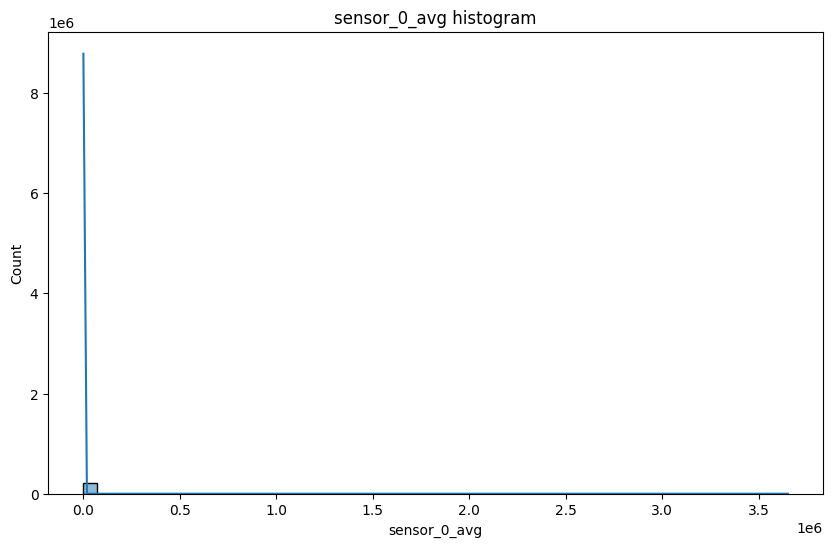

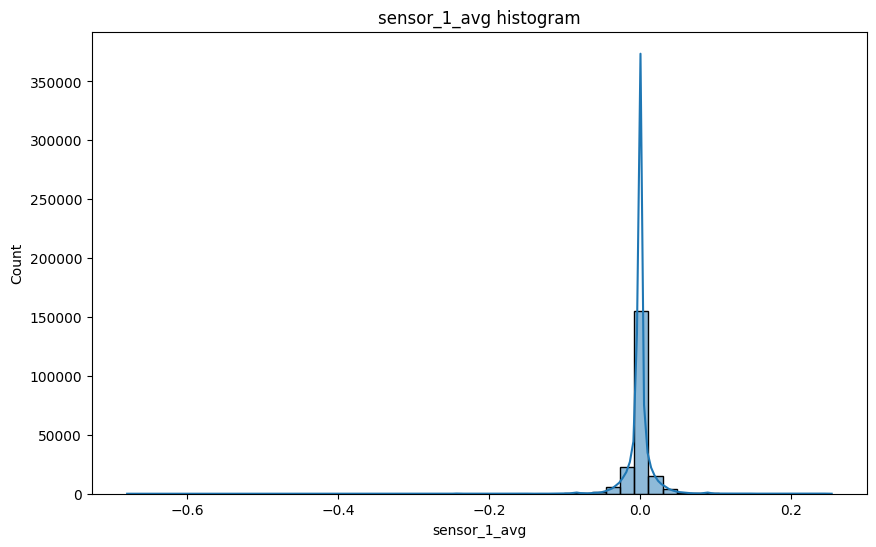

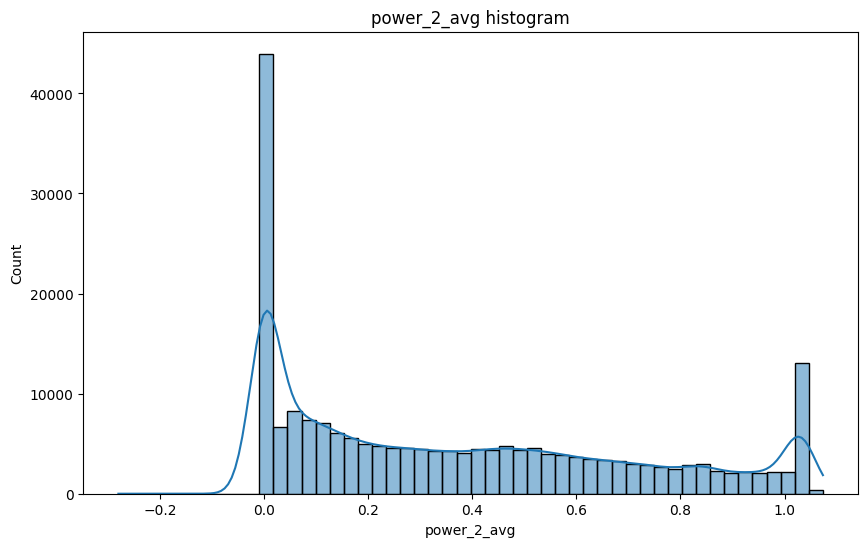

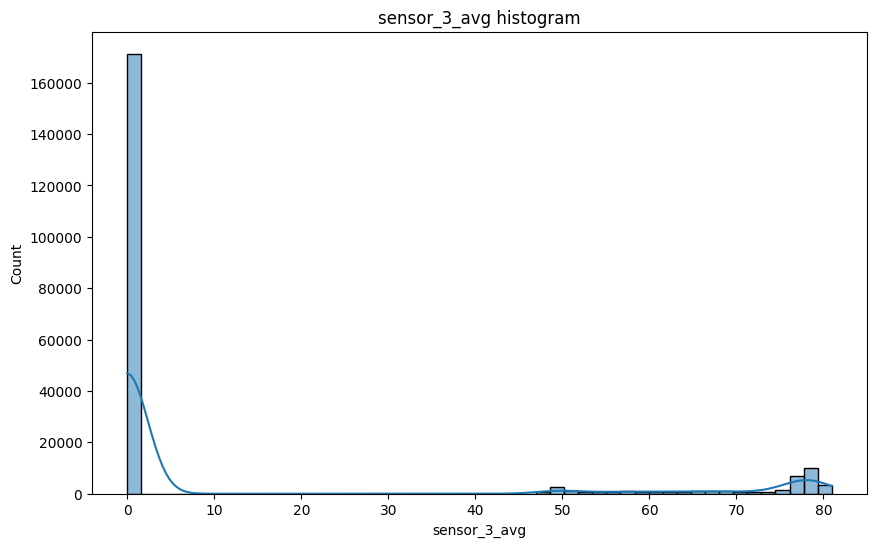

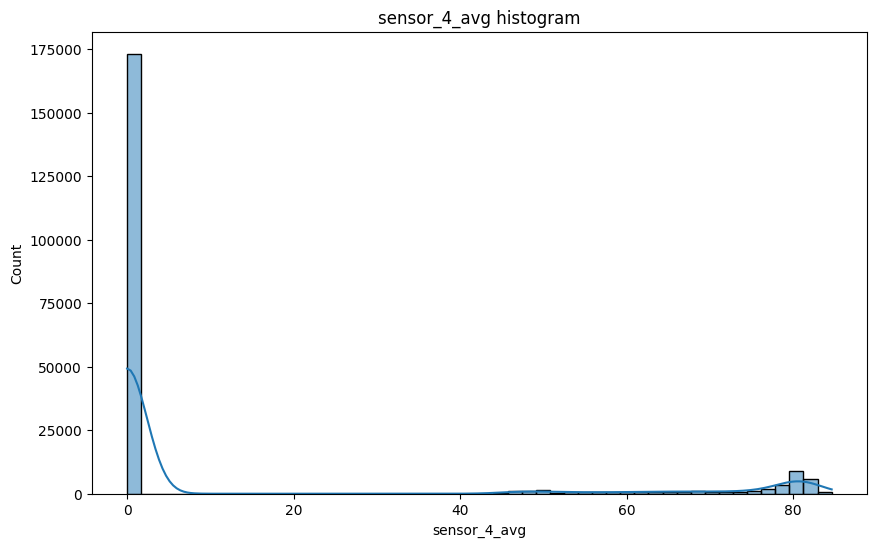

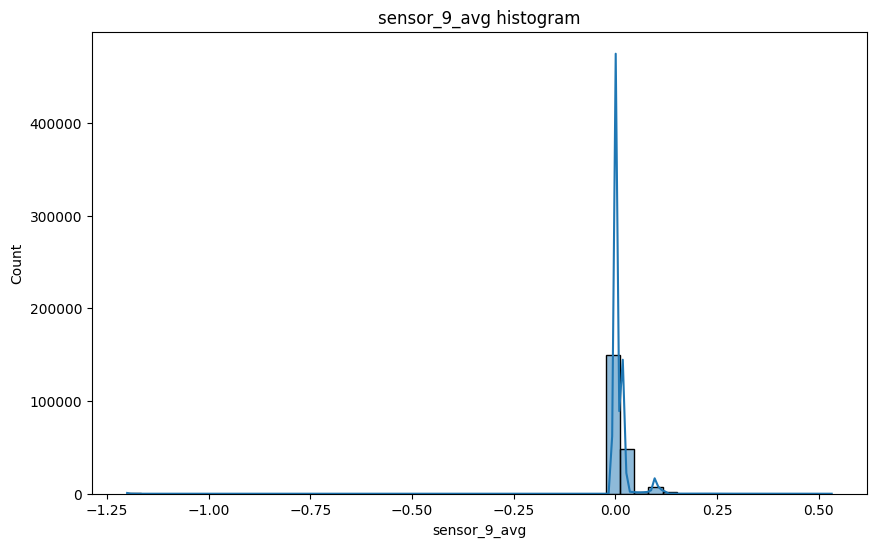

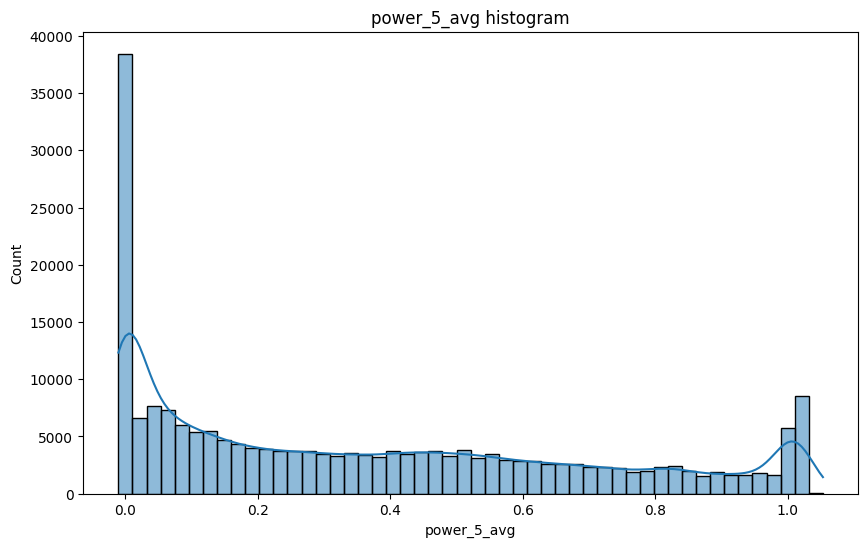

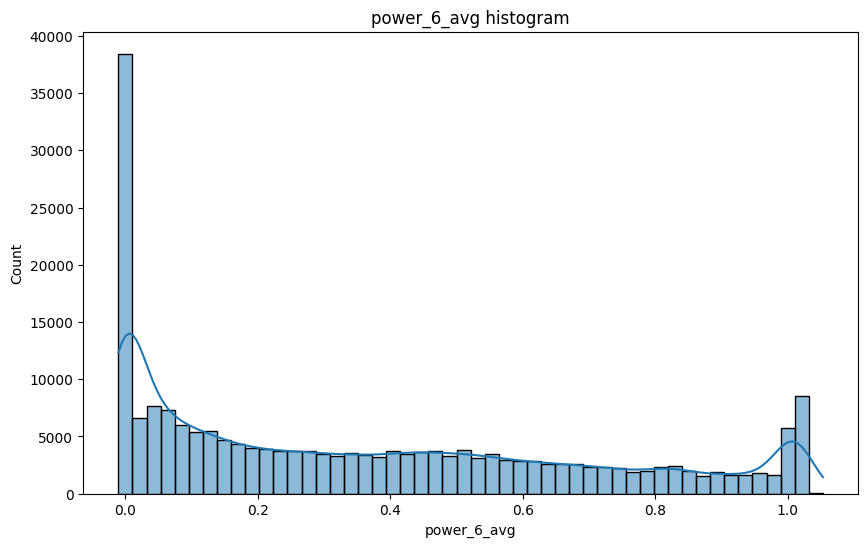

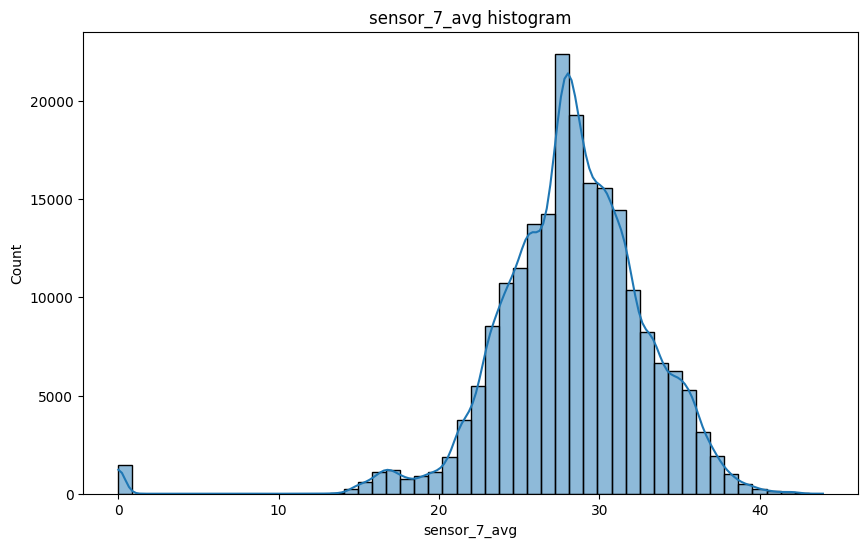

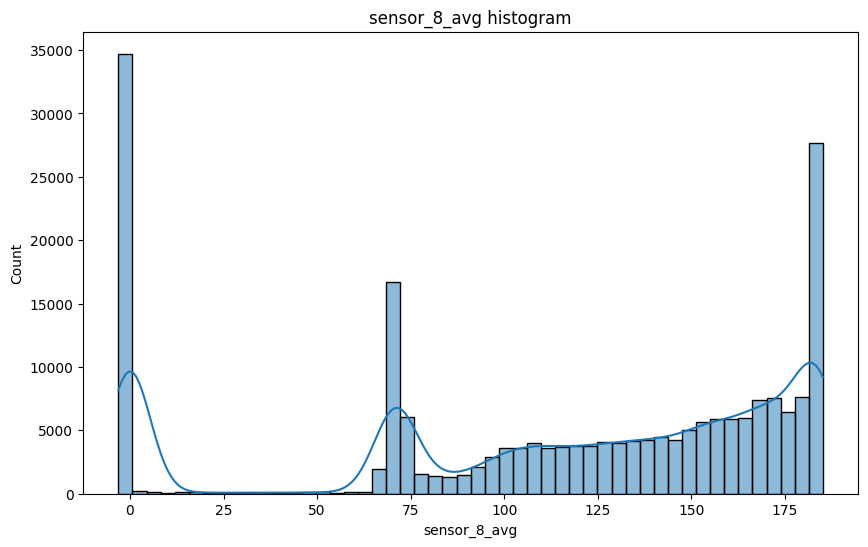

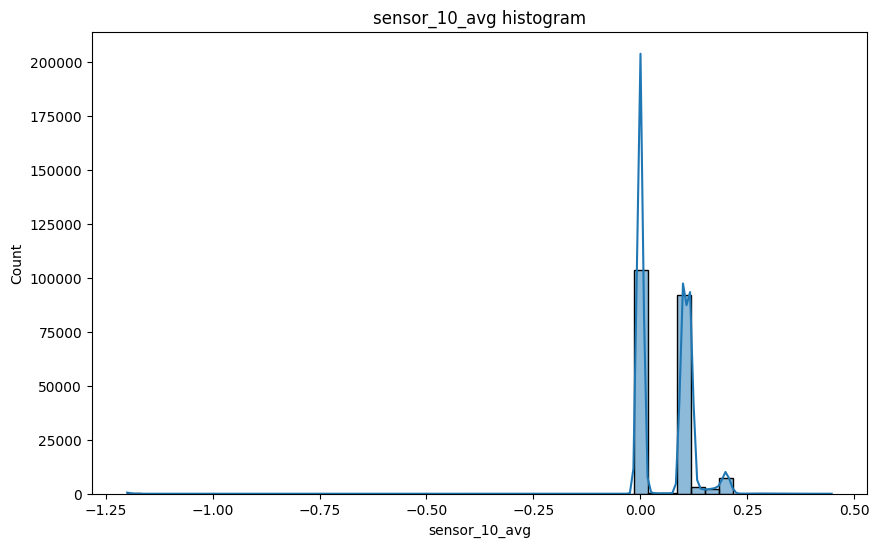

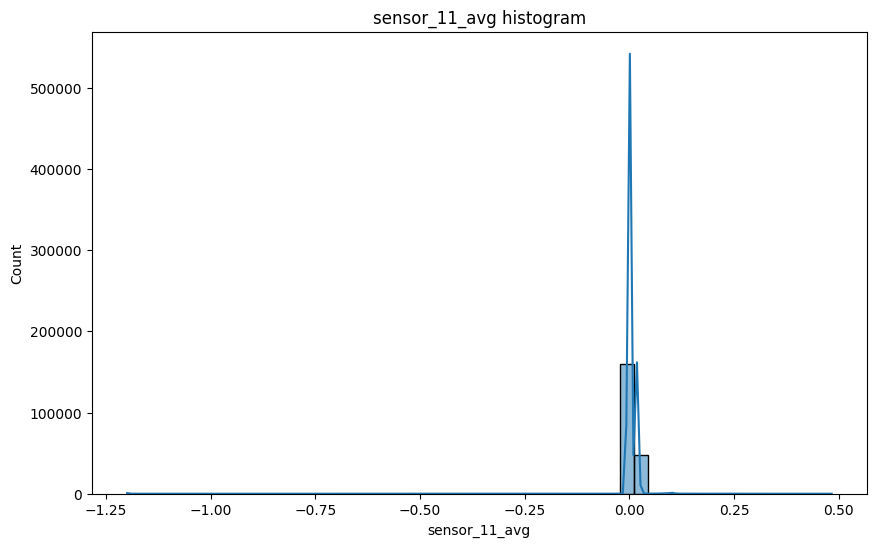

In [4]:
# Plot the max and min values of each sensor 

for sensor in X_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[sensor], bins=50, kde=True)
    plt.title(f"{sensor} histogram")
    plt.show()
